# Convolutionary Autoencoder w/ RGBA

In [1]:
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load pallets library from project root
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from pallets import (
    images as I,
    datasets as DS,
    models as M,
    logging as L
)


# Settings

In [ ]:
SAVE_NAME = 'ae.conv.rgba'

In [3]:
USE_GPU = True
LOG_LEVEL = 'INFO'
LABELS_FILE = 'pallets_labels.json'

TEST_SIZE = 1000
EPOCHS = 10
LR = 1e-03
BATCH_SIZE = 32


In [4]:
# To GPU, or not to GPU
device = M.get_device(require_gpu=USE_GPU)

# Logging
L.init_logger(level=LOG_LEVEL, notebook=True)


<Logger pallets (INFO)>

# Dataset

In [5]:
dataset = DS.CPunksDataset(labels_file=LABELS_FILE, test_size=TEST_SIZE)

# Uncomment to put entire dataset in GPU RAM
# dataset = DS.FastCPunksDataset(
#     device, labels_file=LABELS_FILE, test_size=TEST_SIZE
# )


INFO | loading punk images
INFO | - image 0
INFO | - image 1000
INFO | - image 2000
INFO | - image 3000
INFO | - image 4000
INFO | - image 5000
INFO | - image 6000
INFO | - image 7000
INFO | - image 8000
INFO | - image 9000
INFO | punk images complete
INFO | loading punk labels: ../../cpunks-10k/cpunks/data/punks.json


In [ ]:
train_sampler = SubsetRandomSampler(dataset.train_idx)
test_sampler = SubsetRandomSampler(dataset.test_idx)

train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE, sampler=test_sampler)

# Training

In [11]:
model = M.ae.ConvRGBAAutoencoder()
criterion = torch.nn.MSELoss()

train_losses, test_losses = M.ae.train(
    device, model, criterion, train_loader, test_loader,
    learn_rate=LR, epochs=EPOCHS
)

M.save(SAVE_NAME, model, train_losses, test_losses)



INFO | model: pallets.models.ae.ConvRGBAAutoencoder
INFO | criterion: torch.nn.modules.loss.MSELoss
INFO | learn rate: 0.001
INFO | epochs: 10
INFO | epoch 1 (  0%) loss: 0.113313
INFO | epoch 1 ( 35%) loss: 0.029328
INFO | epoch 1 ( 70%) loss: 0.016821
INFO | epoch 1 (100%) loss: 0.012290
INFO | epoch 1 (test) loss: 0.000200
INFO | epoch 2 (  0%) loss: 0.000677
INFO | epoch 2 ( 35%) loss: 0.000672
INFO | epoch 2 ( 70%) loss: 0.000582
INFO | epoch 2 (100%) loss: 0.000534
INFO | epoch 2 (test) loss: 0.000115
INFO | epoch 3 (  0%) loss: 0.000454
INFO | epoch 3 ( 35%) loss: 0.000352
INFO | epoch 3 ( 70%) loss: 0.000328
INFO | epoch 3 (100%) loss: 0.000310
INFO | epoch 3 (test) loss: 0.000065
INFO | epoch 4 (  0%) loss: 0.000275
INFO | epoch 4 ( 35%) loss: 0.000244
INFO | epoch 4 ( 70%) loss: 0.000236
INFO | epoch 4 (100%) loss: 0.000224
INFO | epoch 4 (test) loss: 0.000049
INFO | epoch 5 (  0%) loss: 0.000195
INFO | epoch 5 ( 35%) loss: 0.000188
INFO | epoch 5 ( 70%) loss: 0.000176
INFO |

# Results

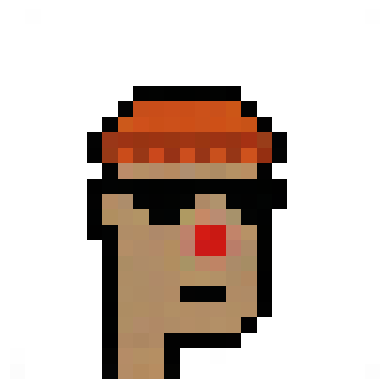

In [12]:
punk, _ = next(iter(train_loader))
reconstructed = model(punk.to(device))
reconstructed = reconstructed.detach().cpu()
some_image = reconstructed[0]

pil_image = to_pil_image(some_image.clone().detach())
plt.imshow(pil_image)
plt.axis('off')
plt.show()

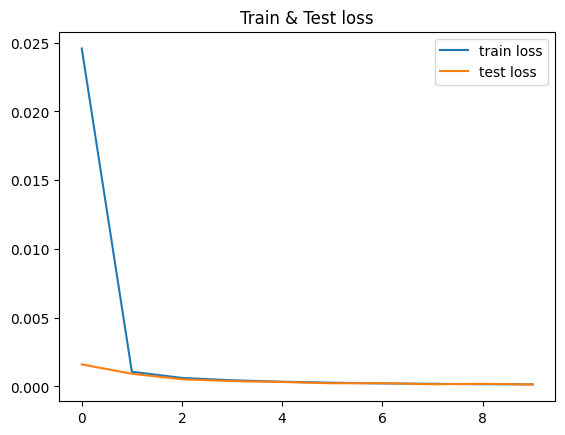

In [13]:
plt.title("Train & Test loss")
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()